# Final Project Notebook - Ames, Iowa Housing Dataset
### By Joy Moglia, Irene Shaffer, Hanan Sukenik
Our project seeks to create a model to predict housing prices using the Ames, Iowa housing dataset from Kaggle. The dataset includes 79 explanatory variables describing residential homes in Ames, Iowa. Kaggle provides training and test datasets and a text file with a description of the data.

kaggle competition page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Notebook Outline:
- Section 1: EDA
- Section 2: Pre-Processing
- Section 3: Feature Selection
- Section 4: Split Training Data into Train (X_train, y_train) and Dev (X_test, y_test) Sets
- Section 5: Find the Best Model
- Section 6: Hyperparameter Tuning
- Section 7: Generate Predictions using Test Data


In __Section 1__ of this notebook, we explore the training and test data. In __Section 2__, we pre-process the data by inspecting the *training data* for NaN values, creating dummy variables for categorical data, and using scaler transforms to standardize and normalize numerical input variables. In __Section 3__, we do feature selection. In __Section 4__, we split our training data into train and dev sets. In __Section 5__, we test several models: random forest, gradient boosting for regression, support vector, and linear regression. We select the model with the best R-squared value. In __Section 6__, we conduct hyperparameter tuning using GridSearchCV. In __Section 7__, we use our final model to generate predictions on the *test dataset*.


## Section 1: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import time
import copy
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats

#### Data Fields:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.</br>
- MSSubClass: The building class</br>
- MSZoning: The general zoning classification</br>
- LotFrontage: Linear feet of street connected to property</br>
- LotArea: Lot size in square feet</br>
- Street: Type of road access</br>
- Alley: Type of alley access</br>
- LotShape: General shape of property</br>
- LandContour: Flatness of the property</br>
- Utilities: Type of utilities available</br>
- LotConfig: Lot configuration</br>
- LandSlope: Slope of property</br>
- Neighborhood: Physical locations within Ames city limits</br>
- Condition1: Proximity to main road or railroad</br>
- Condition2: Proximity to main road or railroad (if a second is present)</br>
- BldgType: Type of dwelling</br>
- HouseStyle: Style of dwelling</br>
- OverallQual: Overall material and finish quality</br>
- OverallCond: Overall condition rating</br>
- YearBuilt: Original construction date</br>
- YearRemodAdd: Remodel date</br>
- RoofStyle: Type of roof</br>
- RoofMatl: Roof material</br>
- Exterior1st: Exterior covering on house</br>
- Exterior2nd: Exterior covering on house (if more than one material)</br>
- MasVnrType: Masonry veneer type</br>
- MasVnrArea: Masonry veneer area in square feet</br>
- ExterQual: Exterior material quality</br>
- ExterCond: Present condition of the material on the exterior</br>
- Foundation: Type of foundation</br>
- BsmtQual: Height of the basement</br>
- BsmtCond: General condition of the basement</br>
- BsmtExposure: Walkout or garden level basement walls</br>
- BsmtFinType1: Quality of basement finished area</br>
- BsmtFinSF1: Type 1 finished square feet</br>
- BsmtFinType2: Quality of second finished area (if present)</br>
- BsmtFinSF2: Type 2 finished square feet</br>
- BsmtUnfSF: Unfinished square feet of basement area</br>
- TotalBsmtSF: Total square feet of basement area</br>
- Heating: Type of heating</br>
- HeatingQC: Heating quality and condition</br>
- CentralAir: Central air conditioning</br>
- Electrical: Electrical system</br>
- 1stFlrSF: First Floor square feet</br>
- 2ndFlrSF: Second floor square feet</br>
- LowQualFinSF: Low quality finished square feet (all floors)</br>
- GrLivArea: Above grade (ground) living area square feet</br>
- BsmtFullBath: Basement full bathrooms</br>
- BsmtHalfBath: Basement half bathrooms</br>
- FullBath: Full bathrooms above grade</br>
- HalfBath: Half baths above grade</br>
- Bedroom: Number of bedrooms above basement level</br>
- Kitchen: Number of kitchens</br>
- KitchenQual: Kitchen quality</br>
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</br>
- Functional: Home functionality rating</br>
- Fireplaces: Number of fireplaces</br>
- FireplaceQu: Fireplace quality</br>
- GarageType: Garage location</br>
- GarageYrBlt: Year garage was built</br>
- GarageFinish: Interior finish of the garage</br>
- GarageCars: Size of garage in car capacity</br>
- GarageArea: Size of garage in square feet</br>
- GarageQual: Garage quality</br>
- GarageCond: Garage condition</br>
- PavedDrive: Paved driveway</br>
- WoodDeckSF: Wood deck area in square feet</br>
- OpenPorchSF: Open porch area in square feet</br>
- EnclosedPorch: Enclosed porch area in square feet</br>
- 3SsnPorch: Three season porch area in square feet</br>
- ScreenPorch: Screen porch area in square feet</br>
- PoolArea: Pool area in square feet</br>
- PoolQC: Pool quality</br>
- Fence: Fence quality</br>
- MiscFeature: Miscellaneous feature not covered in other categories</br>
- MiscVal: dollar Value of miscellaneous feature</br>
- MoSold: Month Sold</br>
- YrSold: Year Sold</br>
- SaleType: Type of sale</br>
- SaleCondition: Condition of sale

#### Read in the data from Kaggle
- df_train: training data
- df_test: test data

In [2]:
# read in data
df_train_full = pd.read_csv("train.csv")  
df_test_full = pd.read_csv("test.csv")

In [3]:
df_train_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# set house ID as the index, since we don't want the model to use this as a feature
df_train = df_train_full.set_index('Id')
df_test = df_test_full.set_index('Id')

In [5]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [7]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [8]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [9]:
test = df_test.index.values
print(test)

[1461 1462 1463 ... 2917 2918 2919]


In [10]:
df_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1159,20,RL,92.0,11932,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1580,1580,GasA,Ex,Y,SBrkr,1580,0,0,1580,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2008.0,RFn,3,830,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,6,2008,ConLD,Partial,235128
1186,50,RL,60.0,9738,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1924,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,392,Unf,0,392,784,GasA,Gd,Y,SBrkr,949,272,0,1221,1,0,1,0,4,1,TA,7,Typ,0,NaN,Attchd,1965.0,Unf,1,392,TA,TA,Y,0,0,236,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,104900
709,60,RL,65.0,9018,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2007.0,Fin,2,400,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,179540
983,20,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1266,1266,GasA,Ex,Y,SBrkr,1266,0,0,1266,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Fin,2,388,TA,TA,Y,100,16,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,159895
363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


In [11]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [12]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_test.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2234,20,RL,82.0,11202,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,206.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1029.0,Unf,0.0,403.0,1432.0,GasA,Ex,Y,SBrkr,1440,0,0,1440,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2.0,467.0,TA,TA,Y,185,95,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
2341,20,RL,85.0,9965,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
2867,50,RL,56.0,6956,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,7,1948,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,Fa,TA,Mn,Unf,0.0,Unf,0.0,624.0,624.0,GasA,Ex,Y,SBrkr,624,312,0,936,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1948.0,Unf,1.0,265.0,TA,Po,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
2520,60,RL,43.0,12352,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,638.0,Unf,0.0,215.0,853.0,GasA,Ex,Y,SBrkr,853,900,0,1753,1.0,0.0,2,1,3,1,TA,7,Typ,1,Fa,Attchd,1998.0,RFn,2.0,534.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
2268,20,RL,81.0,13870,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,PosA,PosA,1Fam,1Story,10,5,2006,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,250.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1152.0,Unf,0.0,590.0,1742.0,GasA,Ex,Y,SBrkr,2042,0,0,2042,1.0,0.0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,724.0,TA,TA,Y,240,52,0,0,174,0,NaN,NaN,NaN,0,10,2007,New,Partial


In [14]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
# There is one extra column in the training dataset for housing prices
# The training data has the extra column "SalePrice", the dependent variable

print(df_train.shape)
print(df_test.shape)
print([x for x in df_train.columns if x not in df_test.columns])
print([x for x in df_test.columns if x not in df_train.columns])

(1460, 80)
(1459, 79)
['SalePrice']
[]


In [16]:
# Looking more closely into the Sale Price for the training data

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

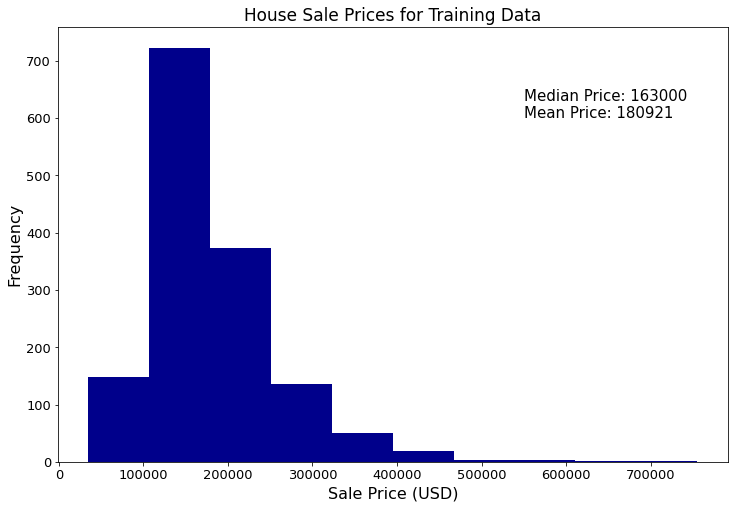

In [17]:
# Plotting the distribution of house sale prices

fig, ax1 = plt.subplots(figsize = (12,8))
bar1 = ax1.hist(df_train["SalePrice"], linewidth=4, color = "darkblue")
ax1.set_xlabel(xlabel ='Sale Price (USD)', fontsize = 16)
ax1.set_ylabel(ylabel = 'Frequency', fontsize = 16)
ax1.set_title(label = 'House Sale Prices for Training Data', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax1.annotate(f'Median Price: {int(df_train["SalePrice"].median())}\nMean Price: {int(df_train["SalePrice"].mean())}', xy=(3, 3),
             xycoords='data',  fontsize = 15,
             xytext=(550000, 600),
             textcoords='data',
           )
plt.show()

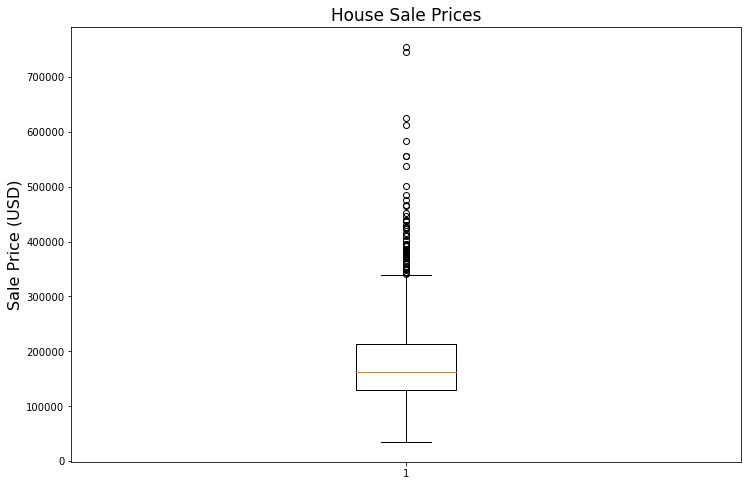

In [18]:
# Plotting the distribution of house sale prices to detect outliers

fig, ax1 = plt.subplots(figsize = (12,8))
bar1 = ax1.boxplot(df_train["SalePrice"])
ax1.set_ylabel(ylabel ='Sale Price (USD)', fontsize = 16)
ax1.set_title(label = 'House Sale Prices', fontsize = 17)
plt.show()

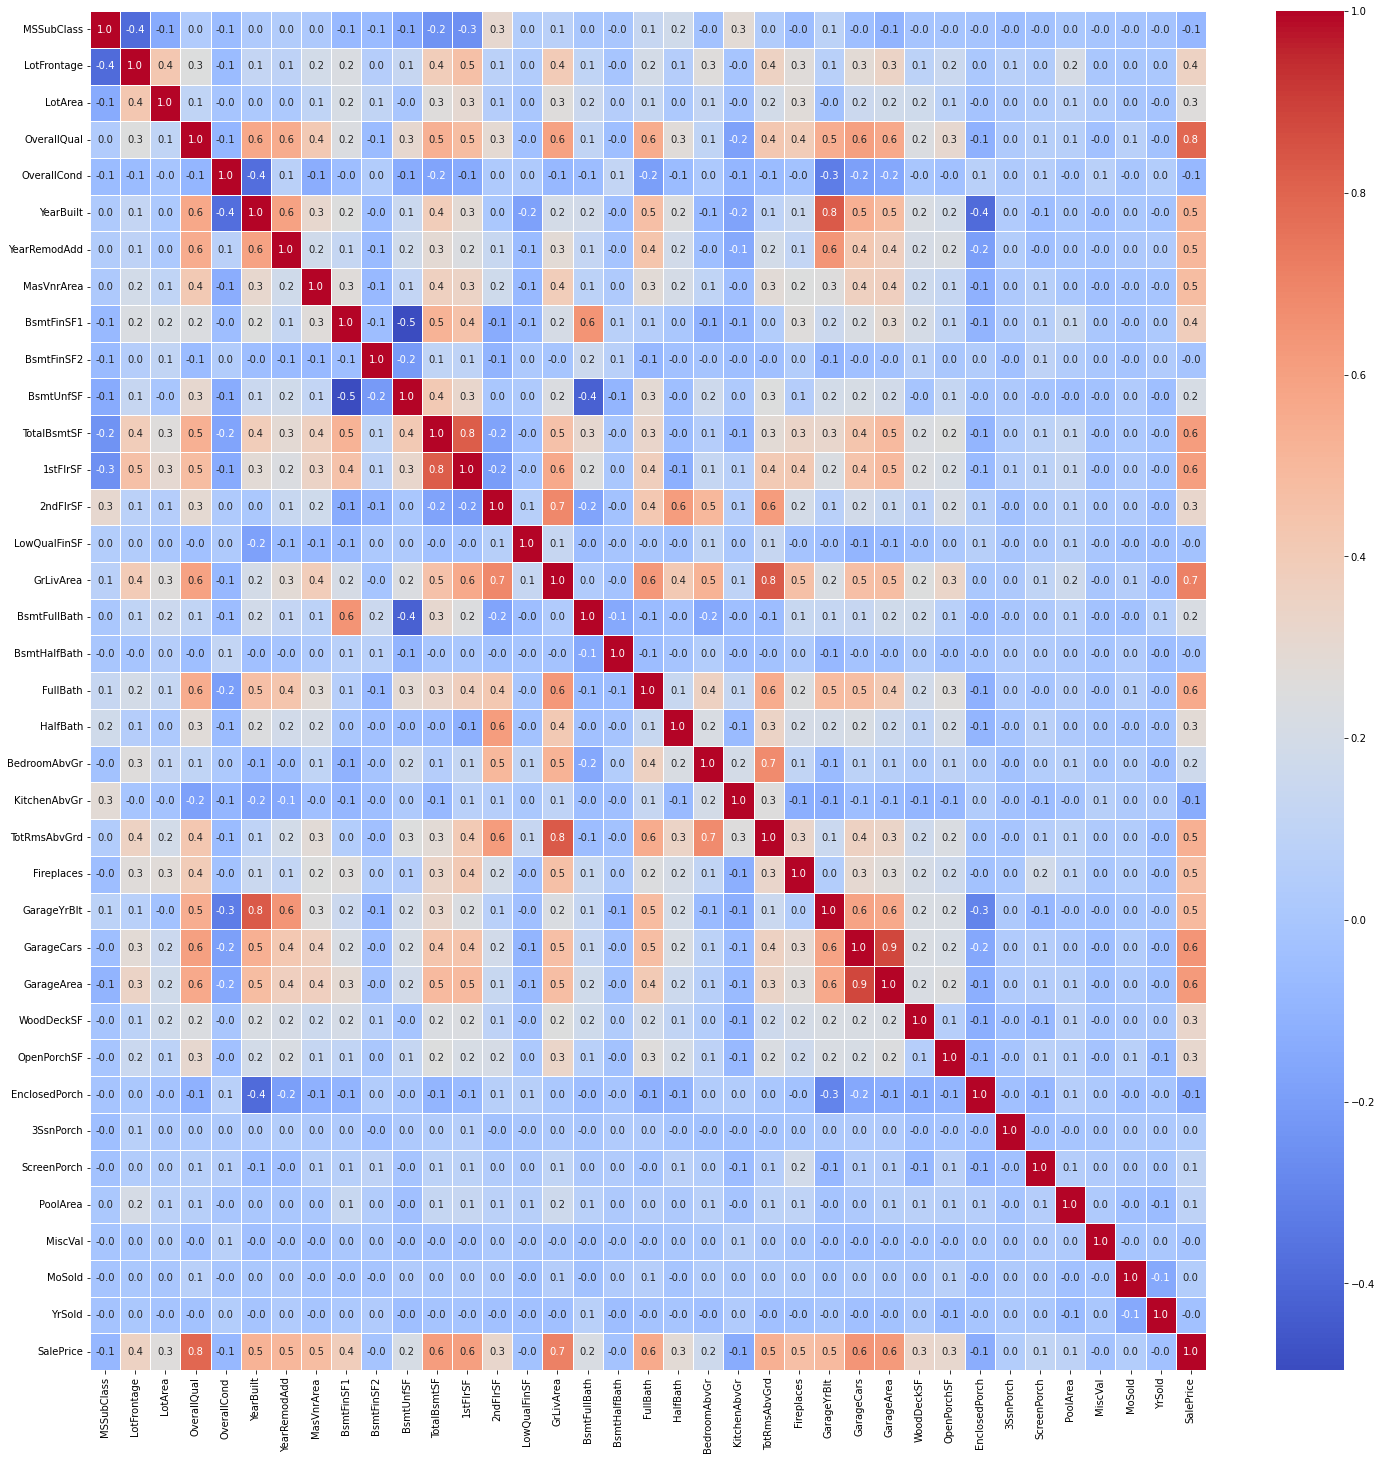

In [19]:
# Checking for feature correlation

f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')
plt.show()

Year home built and year garage built are highly correlated, and garage area is highly correlated with garagecars, which is not surprising.

## Section 2: Pre-Processing

### Inspect and fix NaN values:

In [20]:
# inspect NaN values in the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Columns with NaN values: 
- LotFrontage
- Alley
- 8 NaN values for: MasVnrType, MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical (1 NaN value)
- FireplaceQu
- 27 NaN values for: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
- PoolQC
- Fence
- MiscFeature

#### LotFrontage: replace NaN values with mean

In [21]:
df_train['LotFrontage'].fillna(np.mean(df_train['LotFrontage']), inplace=True)
df_test['LotFrontage'].fillna(np.mean(df_train['LotFrontage']), inplace=True)

#### Alley: data description says NaN means no alley. Replace NaN values with "No alley"

In [22]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [23]:
df_train['Alley'].fillna("No alley", inplace=True)
df_test['Alley'].fillna("No alley", inplace=True)

#### MasVnrType & MasVnrArea : Masonry veneer type & area. Given only 8 NaN values in the training data, replace with "None" and zeros

In [24]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
df_train['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [26]:
df_train['MasVnrType'].fillna("None", inplace=True)

In [27]:
df_train['MasVnrArea'].fillna(0.0, inplace=True)

In [28]:
df_test['MasVnrType'].fillna("None", inplace=True)
df_test['MasVnrArea'].fillna(0.0, inplace=True)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: data description says NA indicates no basement. Replace NaN values with "No basement"

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col].fillna("No basement", inplace=True)
    df_test[col].fillna("No basement", inplace=True)

#### Electrical: only 1 NaN value. Since most homes use Standard Circuit Breakers (SBrKr), use that value.

In [30]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
df_train['Electrical'].fillna("SBrkr", inplace=True)
df_test['Electrical'].fillna("SBrkr", inplace=True)

#### FireplaceQu: data description says NA means no fireplace. Replace NaN values with "No fireplace"

In [32]:
df_train['FireplaceQu'].fillna("No fireplace", inplace=True)
df_test['FireplaceQu'].fillna("No fireplace", inplace=True)

#### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond: data description says NA means no garage. Replace NaN values with "No garage"

In [33]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col].fillna("No garage", inplace=True)
    df_test[col].fillna("No garage", inplace=True)

In [34]:
# Use year house is built to fill NA values
df_train['GarageYrBlt'].fillna(df_train["YearBuilt"], inplace=True)
df_test['GarageYrBlt'].fillna(df_train["YearBuilt"], inplace=True)

#### PoolQC: data description says NA means no pool. Replace NaN values with "No pool"

In [35]:
df_train['PoolQC'].fillna("No pool", inplace=True)
df_test['PoolQC'].fillna("No pool", inplace=True)

#### Fence: data description says NaN means no fence. Replace NaN values with "No fence":

In [36]:
df_train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [37]:
df_train['Fence'].fillna("No fence", inplace=True)
df_test['Fence'].fillna("No fence", inplace=True)

#### MiscFeature: data description says NA means none. Replace NaN values with "No other features"

In [38]:
df_train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [39]:
df_train['MiscFeature'].fillna("No other features", inplace=True)
df_test['MiscFeature'].fillna("No other features", inplace=True)

#### Confirm there are no more NaN values in training data:

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [41]:
# identify remaining NaN values in test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Object dtypes:
- MSZoning       
- Utilities   
- Exterior1st    
- Exterior2nd 
- KitchenQual   
- Functional  
- SaleType       

Numerical dtypes:
- BsmtFinSF1     
- BsmtFinSF2
- BsmtUnfSF   
- TotalBsmtSF  
- BsmtFullBath   
- BsmtHalfBath   
- GarageYrBlt    
- GarageCars     
- GarageArea     

In [42]:
# fix object dtypes
for col in ('MSZoning', 'Utilities', 'Exterior1st','Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'):
    df_test[col] = df_test[col].fillna('None')
# fix numerical dtypes
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'):
    df_test[col] = df_test[col].fillna(0)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

### Create dummies to convert categorical data into binary

In [44]:
# Split training data into X and y
y = df_train["SalePrice"]
X = df_train.drop('SalePrice', axis = 1)

In [45]:
X.shape

(1460, 79)

In [46]:
# Combine the data to do one hot encoding
train = X
test = df_test

# Create a column to indicate whether train or test
train['train']=1 
test['train']=0

# Combine the datasets
combined = pd.concat([train,test])

In [47]:
# Generate dummies
df = pd.get_dummies(combined, drop_first=True)

In [48]:
# Split the dataset back into training and test
X = df[df['train']==1]
df_test = df[df['train']==0]

In [49]:
# Drop the train column
X = X.drop(['train'], axis=1)
df_test = df_test.drop(['train'], axis=1)


In [50]:
print(X.shape)
print(df_test.shape)

(1460, 266)
(1459, 266)


### Use MinMaxScaler to rescale numerical data between 0 and 1

Features that could be re-scaled:
- MSSubClass
- LotFrontage
- LotArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea


In [51]:
# Rescale training data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,FireplaceQu_Gd,FireplaceQu_No fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,GarageFinish_No garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No fence,MiscFeature_No other features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.949275,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.753623,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.934783,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.913043,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.927536,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0

In [53]:
# Rescale test data
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

## Section 3: Check feature importance

In [54]:
# Check feature importance with random forest
rf_model = RandomForestRegressor(n_estimators = 100, oob_score = True) 
rf_model.fit(X, y)
rf_features_ranked = sorted(zip(rf_model.feature_importances_, X.columns), key=lambda x: x[0])

C:\Users\jmoglia\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [55]:
rf_features_ranked

[(0.0, 'MSZoning_None'),
 (0.0, 'Utilities_None'),
 (0.0, 'Condition2_PosA'),
 (0.0, 'Condition2_RRAe'),
 (0.0, 'RoofStyle_Shed'),
 (0.0, 'Exterior1st_None'),
 (0.0, 'Exterior2nd_None'),
 (0.0, 'KitchenQual_None'),
 (0.0, 'Functional_None'),
 (0.0, 'SaleType_None'),
 (3.6931283123286124e-09, 'Exterior1st_ImStucc'),
 (2.2993534952460926e-08, 'Heating_Wall'),
 (2.373731227695375e-08, 'RoofMatl_Roll'),
 (2.517400096398827e-08, 'MiscFeature_Othr'),
 (3.289033105274163e-08, 'Utilities_NoSeWa'),
 (4.634292236039423e-08, 'HeatingQC_Po'),
 (9.366496816962674e-08, 'Condition2_RRAn'),
 (1.1412940960468657e-07, 'Foundation_Wood'),
 (1.2962771066576047e-07, 'MiscFeature_TenC'),
 (1.5755694811016408e-07, 'Exterior2nd_CBlock'),
 (1.7345292674401998e-07, 'SaleType_ConLD'),
 (1.920062465671429e-07, 'Neighborhood_BrDale'),
 (2.8754321896353467e-07, 'ExterCond_Po'),
 (3.131685565615214e-07, 'Condition2_RRNn'),
 (3.996762369600423e-07, 'Neighborhood_Blueste'),
 (4.5331686587904174e-07, 'GarageQual_Po'),


OverallQual and GrLivArea are the most important features. OverallQual rates the overall material and finish of the house. GrLivArea is the above grade (ground) living area square feet.

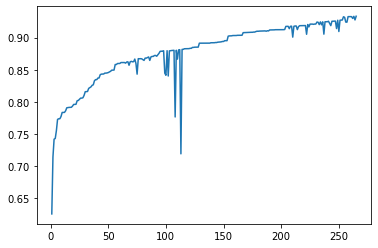

In [56]:
# Plot num features vs. model scores
keep = range(1,len(X.columns))

fig, ax = plt.subplots()
scores = []
for num in keep:
    cols = [_[1] for _ in rf_features_ranked[-num:]] 
    lr = LinearRegression()
    lr.fit(X[cols], y)
    scores.append(lr.score(X[cols], y))
    
ax.plot(keep, scores)


The model should perform decently well with just the top 100 features

In [57]:
# Check feature importance with lasso L1 regression
lasso = Lasso()
lasso.fit(X, y)
coef = lasso.coef_

C:\Users\jmoglia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.232e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


In [58]:
sorted(zip(coef, X.columns), key=lambda x: x[0])

[(-230718.50471297203, 'Condition2_PosN'),
 (-148532.15726917266, 'PoolQC_Fa'),
 (-127777.98153683176, 'PoolQC_Gd'),
 (-117132.09288426464, 'Condition2_RRAe'),
 (-115655.25905475701, 'GarageQual_Po'),
 (-98200.89721593824, 'GarageQual_Fa'),
 (-92359.82874207672, 'GarageQual_TA'),
 (-91779.19764959262, 'GarageQual_Gd'),
 (-52883.35886953121, 'GarageCond_No garage'),
 (-40418.45927035156, 'KitchenAbvGr'),
 (-38566.450330965614, 'Functional_Sev'),
 (-38194.87287228665, 'LandSlope_Sev'),
 (-36956.96879149104, 'Utilities_NoSeWa'),
 (-29487.638173615072, 'Electrical_Mix'),
 (-29316.573980826648, 'BedroomAbvGr'),
 (-26322.89466452759, 'Foundation_Wood'),
 (-23921.680880395048, 'KitchenQual_Gd'),
 (-23038.552895914916, 'KitchenQual_TA'),
 (-21451.13068127994, 'BsmtFinType2_No basement'),
 (-21124.298042551243, 'Exterior2nd_Other'),
 (-20430.591666993612, 'ExterQual_Gd'),
 (-20218.64940437183, 'KitchenQual_Fa'),
 (-19859.85764999708, 'ExterQual_TA'),
 (-19458.521519304337, 'Neighborhood_Edwards

Features with a coefficient of zero should be dropped

### Drop Columns

In [59]:
# Based on the analysis above, only keep the 100 most important features based on random forest

X_100 =X[[_[1] for _ in rf_features_ranked[-100:]]] 

- X is the training data with all features
- X_100 is the training data with the top 100 most important features

## Section 4: Split Training Data into Train & Dev Sets

In [60]:
# Variables for all columns
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, shuffle=True)

In [61]:
# Variables for top 100 features
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(
    X_100, y, random_state=42, shuffle=True)

## Section 5: Find Best ML Algorithm

In [62]:
# Function to compare model scores
rmse_train= []
r2_train=[]
rmse_test=[]
r2_test=[]
mape_test=[]

def compare(model, x_train=X_train, x_test=X_test):
    
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    rmse_train.append(mean_squared_error(pred_train, y_train, squared=False))
    r2_train.append(r2_score(pred_train, y_train))
    pred_test = model.predict(x_test)
    rmse_test.append(mean_squared_error(pred_test, y_test, squared=False))
    r2_test.append(r2_score(pred_test, y_test))
    diff = list((pred_test-y_test)/y_test)
    #mape_test.append(round(np.mean(np.abs(diff)),4)*100)
    mape_test.append(mean_absolute_percentage_error(y_test, pred_test))

# compare different models using all features, and top 100 features
models_run = ['RF-all', 'RF-100', 'GB-all', 'GB-100', 'SV-all', 'SV-100', 'LR-all', 'LR-100']
compare(RandomForestRegressor())
compare(RandomForestRegressor(),X_train_100,X_test_100)
compare(GradientBoostingRegressor())
compare(GradientBoostingRegressor(),X_train_100,X_test_100)
compare(SVR(C=220000))
compare(SVR(C=220000),X_train_100,X_test_100)
compare(LinearRegression())
compare(LinearRegression(),X_train_100,X_test_100)

# print(f'MSE train {rmse_train}')
# print(f'R2 train {r2_train}')
# print(f'MSE test {rmse_test}')
# print(f'R2 test {r2_test}')
# print(f'MAPE test {mape_test}')

''

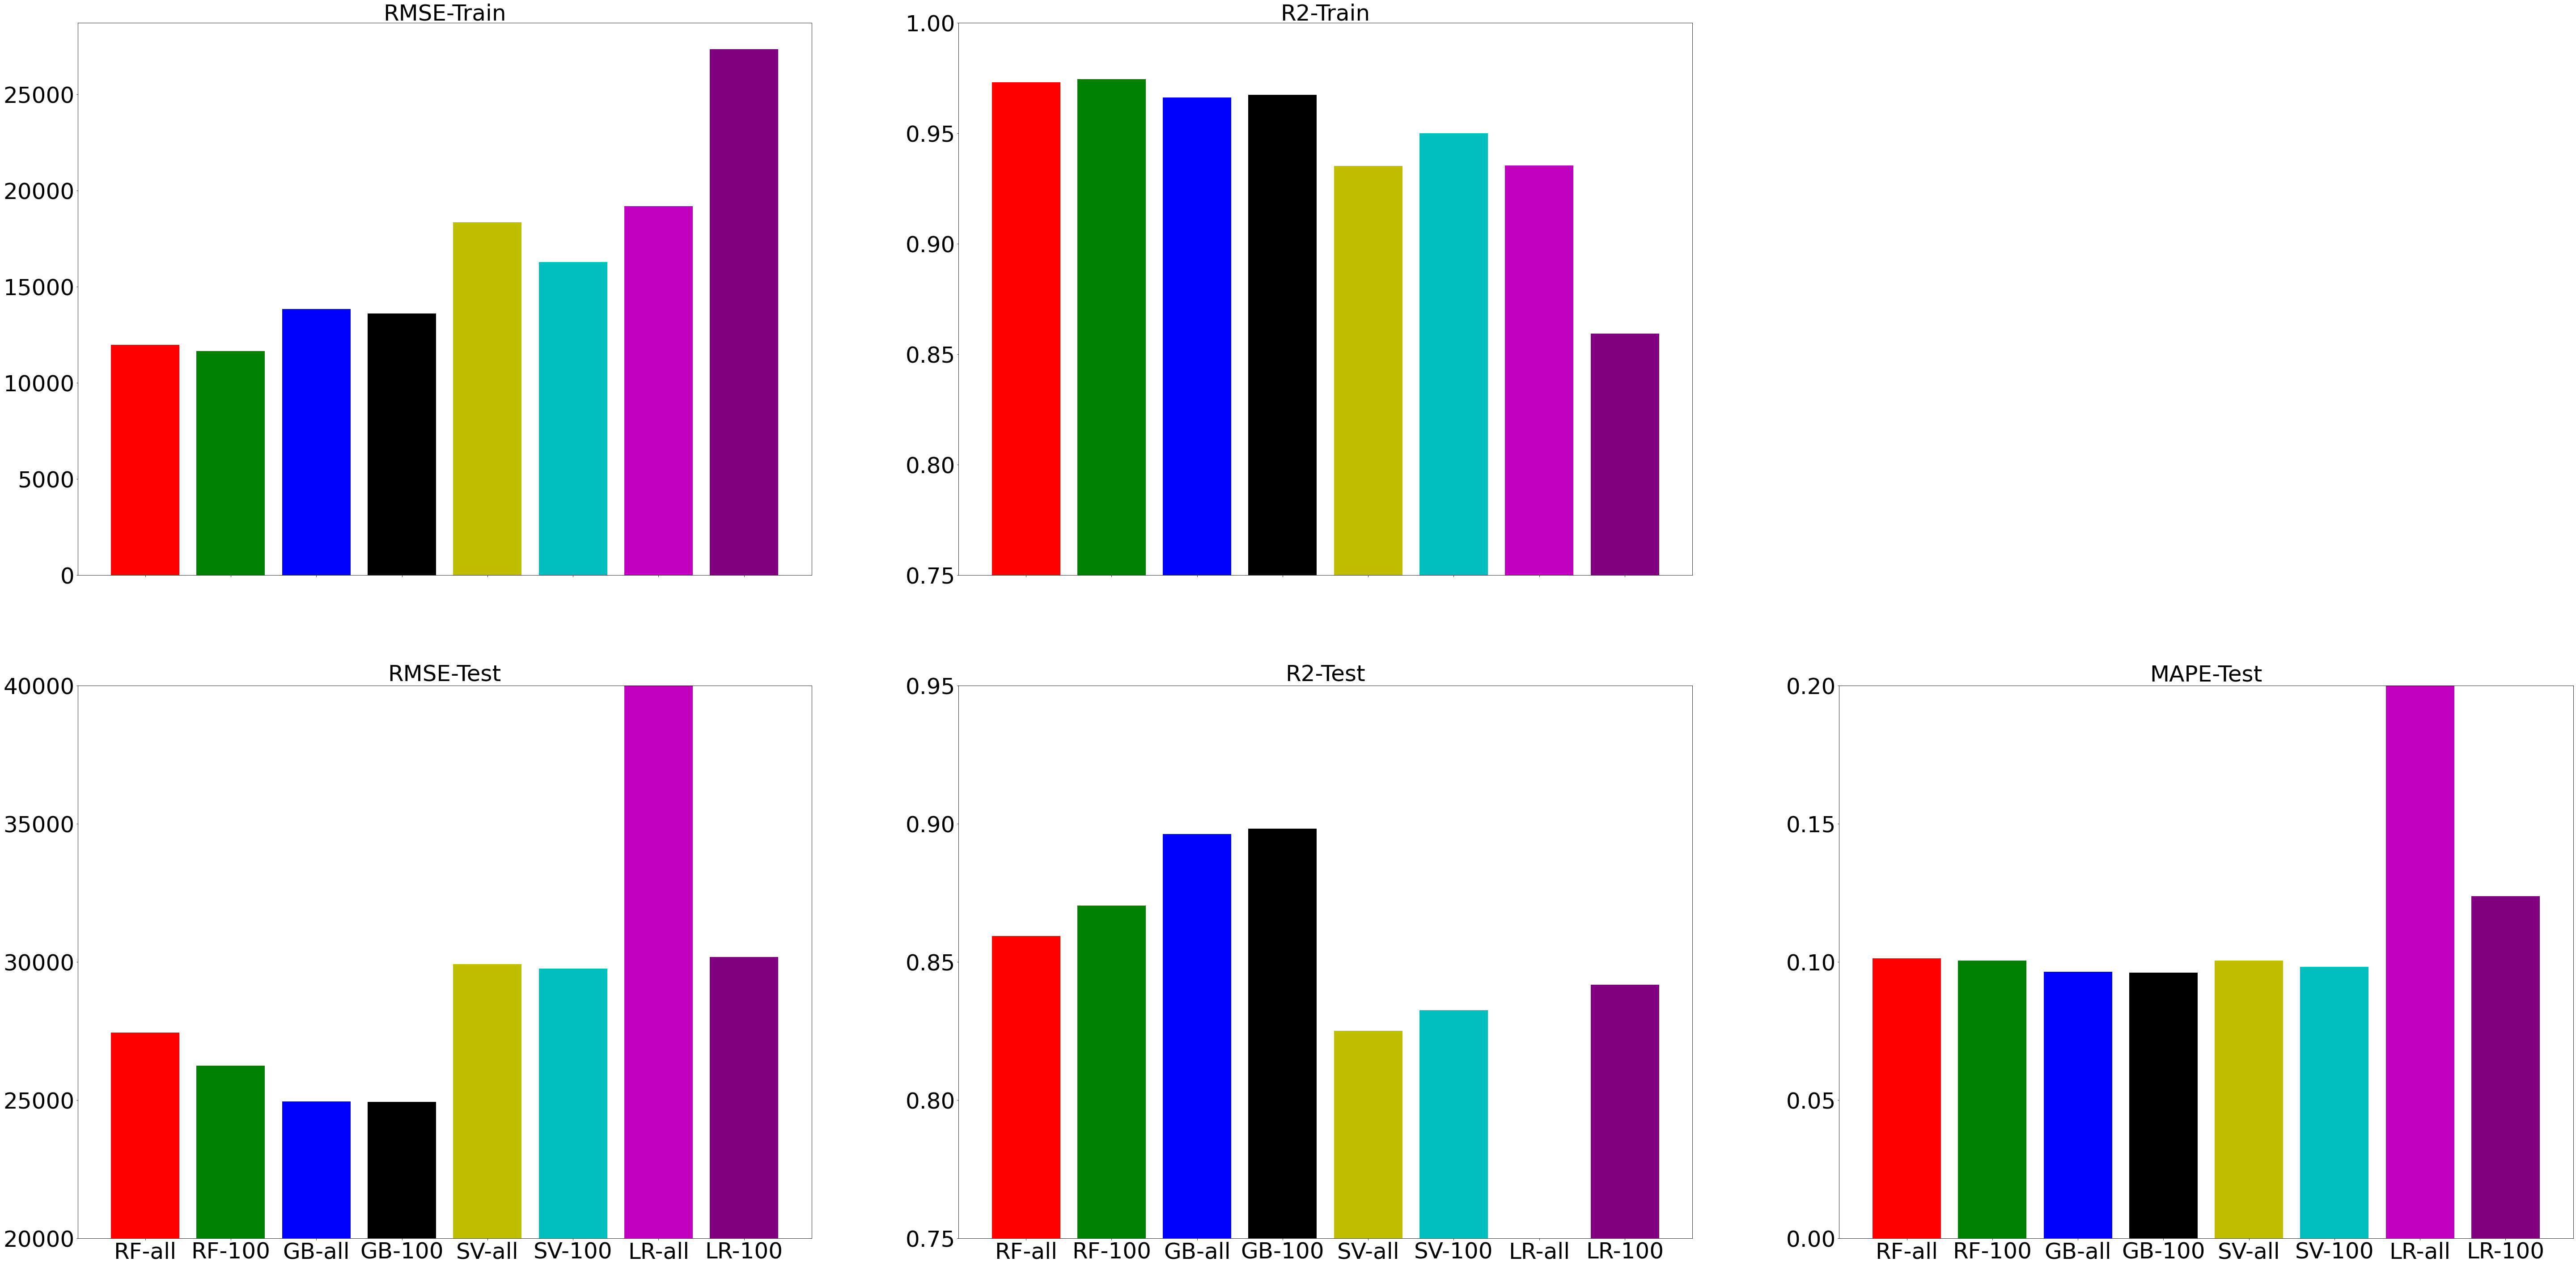

In [80]:
fig, ax = plt.subplots(2,3,figsize=(100,50), sharex=True)
x=range(1,9) #8 models
c = ['r', 'g', 'b', 'k', 'y', 'c', 'm', 'purple']

ax[0][0].bar(x, rmse_train, color=c)
ax[0][0].set_title("RMSE-Train", fontsize=50)
ax[0][1].bar(x, r2_train, color=c)
ax[0][1].set_title("R2-Train", fontsize=50)
ax[1][0].bar(x, rmse_test, color=c)
ax[1][0].set_title("RMSE-Test", fontsize=50)
ax[1][1].bar(x, r2_test, color=c)
ax[1][1].set_title("R2-Test", fontsize=50)
ax[1][2].bar(x, mape_test, color=c)
ax[1][2].set_title("MAPE-Test", fontsize=50)
ax[0][0].set_xticks(x, models_run, fontsize=50)
ax[0][1].set_xticks(x, models_run, fontsize=50)
ax[1][0].set_xticks(x, models_run, fontsize=50)
ax[1][1].set_xticks(x, models_run, fontsize=50)
ax[1][2].set_xticks(x, models_run, fontsize=50)
# set y-axis ranges
ax[0][1].set_ylim(0.75,1)
ax[1][1].set_ylim(0.75,0.95)
ax[1][2].set_ylim(0, 0.2)
ax[1][0].set_ylim(20000, 40000)
ax[0][2].remove()
plt.rcParams.update({'font.size': 100})
;

Linear regression with all features failed to converge. Gradient boosting with all features performed the best.

## Section 6: Hyperparameter Tuning

Use Gridsearch to find optimal hyperparameters (loss, learning_rate, n_estimators)


In [64]:
# find best loss function
gbm = GradientBoostingRegressor() 
parameters = {'loss':('squared_error', 'absolute_error', 'huber', 'quantile')}
grid_search = GridSearchCV(gbm, parameters)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'loss': 'absolute_error'}

In [65]:
# find best max depth
gbm = GradientBoostingRegressor(loss='absolute_error') 
parameters = {'max_depth': [1,3,7,9]}
grid_search = GridSearchCV(estimator=gbm, param_grid=parameters)
grid_search.fit(X_train, y_train)
grid_search.best_params_  

{'max_depth': 7}

In [66]:
# We tried tuning other parameters but had issues running this code

# param_grid = {'n_estimators': [100,500,1000,2000,3000],
#               'learning_rate': [0.01, 0.02, 0.05, 0.1],
#               'max_depth': [1, 2, 3, 4, 5, 6],
#               'min_samples_leaf': [5,10,15,20],
#               'min_samples_split': [2,5,10]}

# gbm = GradientBoostingRegressor(loss='absolute_error') 

# grid_search = GridSearchCV(gbm, param_grid, cv=3, n_jobs=-1)

# grid_search.fit(X_train_100, y_train)

# grid_search.best_params_  

## Section 7: Use Final Model to Generate Predictions Using Test Data

In [72]:
# gradient boosting model with hypertuned parameters
params = {'max_depth': 7,  
          'loss': 'absolute_error'}

final_model = GradientBoostingRegressor(**params)

# fit on the entire training data
final_model.fit(X, y)

# show R2
print(final_model.score(X, y))

0.9719793685877257


In [73]:
# Predict saleprice for test data
y_pred = final_model.predict(df_test)

In [74]:
y_pred

array([155153.02984344, 166533.77965193, 187759.63764955, ...,
       187229.16226805, 134170.71720462, 224072.85333302])

In [75]:
submission = pd.DataFrame({'Id': df_test_full.Id, 'SalePrice': y_pred})
print(submission)

        Id      SalePrice
0     1461  155153.029843
1     1462  166533.779652
2     1463  187759.637650
3     1464  209848.226386
4     1465  200188.989686
...    ...            ...
1454  2915   96575.533800
1455  2916  101090.883258
1456  2917  187229.162268
1457  2918  134170.717205
1458  2919  224072.853333

[1459 rows x 2 columns]


In [76]:
# run this code to generate a CSV with predicted values to submit to Kaggle

# submission.to_csv('submission.csv', encoding='utf-8', index=False)

Kaggle gave us a score of 0.18, representing the root mean squared logarithmic error. There were 5101 total entries submitted for this competition, with scores ranging from 0 (best) to 186 (worst). Our team ranked 4077 out of 5101 at the time of our submission on 12/6/2021.